# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [311]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [312]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [313]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [314]:
# Write your code here
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [315]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [316]:
# Write your code here

#Check to see why rating column has object data type
df['rating'].unique()
#df['day_of_the_week'].unique()

# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)
df['rating'].unique()
df.isnull().sum()
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})



# imputing missing values in Bedroom column

#mean_val = pd.to_numeric(df['rating'], errors='coerce').mean()
#df['rating'] = df['rating'].fillna(mean_val)

#converting the data type to a float
df['rating']=df['rating'].astype(float)

df.info()

#df['rating'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [317]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [435]:
# SHows values that are null
df['rating'].isnull().sum()


736

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

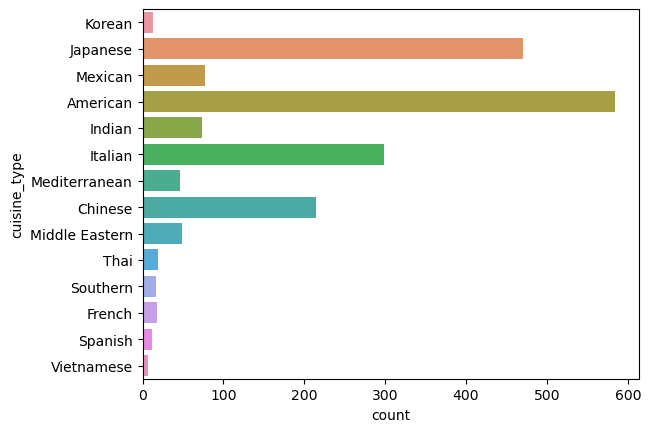

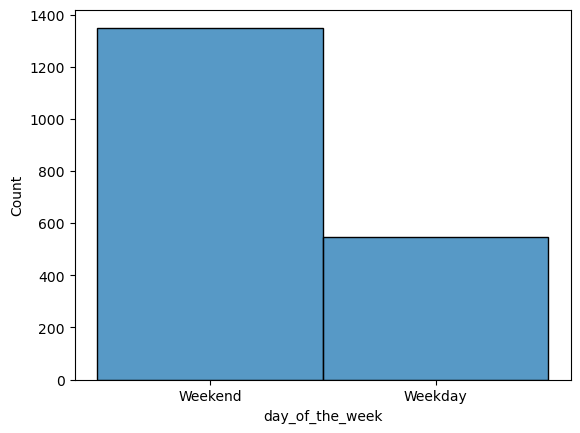

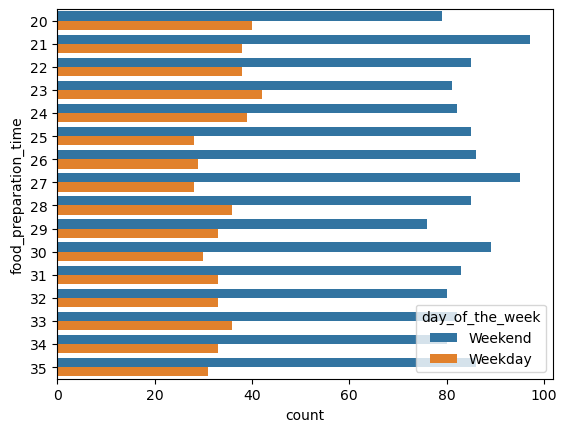

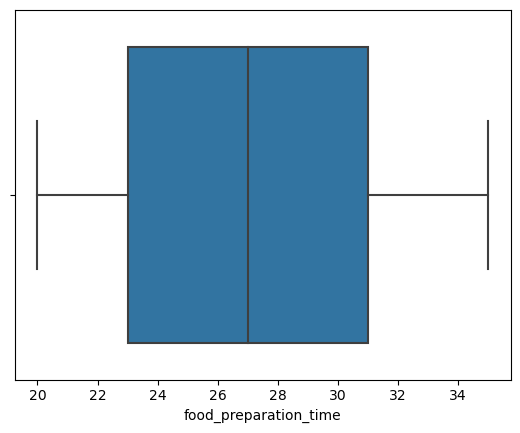

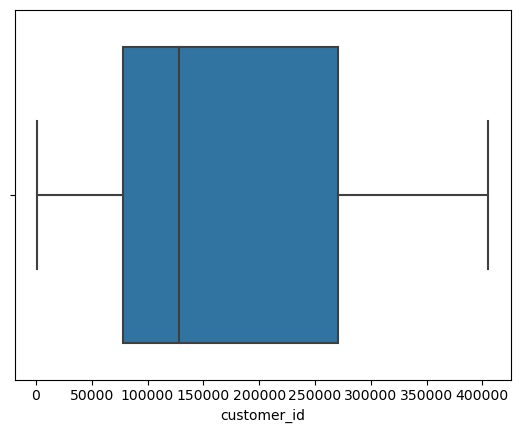

In [460]:

sns.countplot(data=df,y='cuisine_type')
plt.show()
sns.histplot(data=df,x='day_of_the_week',binwidth=3)
plt.show()
sns.countplot(data=df, x='food_preparation_time', hue='day_of_the_week')
plt.show()
sns.boxplot(data=df,x='food_preparation_time', hue='day_of_the_week')
plt.show()
sns.boxplot(data=df,x='customer_id')
plt.show()

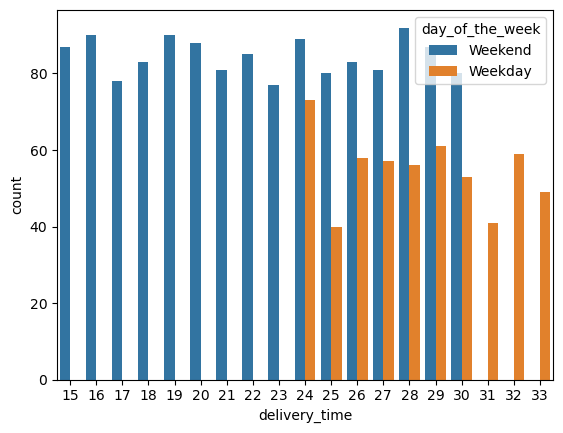

In [449]:
sns.countplot(data=df,x='delivery_time', hue='day_of_the_week')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [320]:
df['restaurant_name'].value_counts().head(5)



Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<Axes: xlabel='count', ylabel='cuisine_type'>

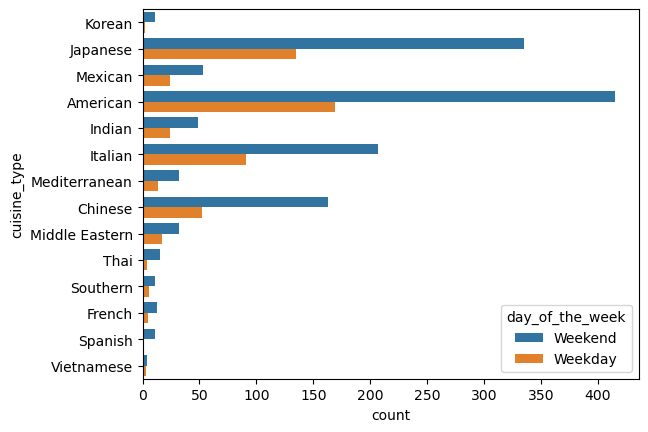

In [321]:
# Write the code here

sns.countplot(data=df,y='cuisine_type', hue="day_of_the_week")



#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [322]:
# Write the code here

#df1 = df['cost_of_the_order'] > 20

df['greater_than_twenty'] = np.where(df['cost_of_the_order']>20, True, False)

df['greater_than_twenty'].value_counts(normalize=True)





False    0.707587
True     0.292413
Name: greater_than_twenty, dtype: float64

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [323]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [324]:
# Write the code here
df['customer_id'].value_counts().head(3)



52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   greater_than_twenty    1898 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 135.4+ KB


C:\Users\andre\AppData\Local\Temp\ipykernel_20068\2636134967.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[vars].corr()
C:\Users\andre\AppData\Local\Temp\ipykernel_20068\2636134967.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);


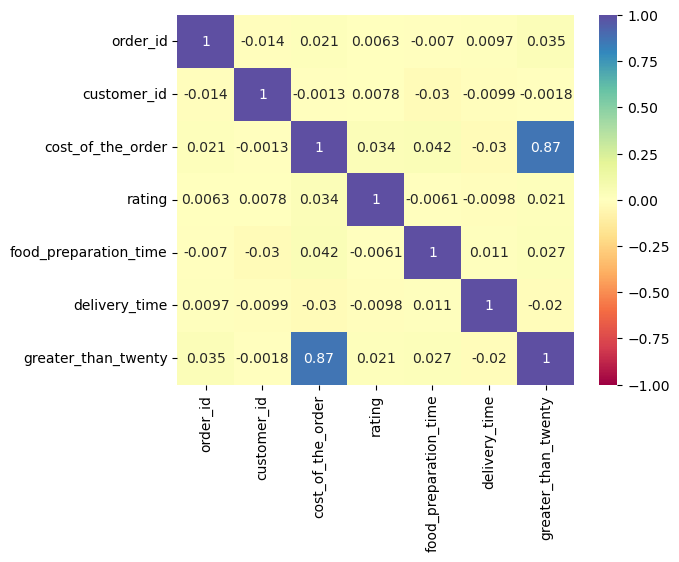

In [343]:
# Write the code here

df.info()

vars = ['order_id', 'customer_id','restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']

corr = df[vars].corr()

df[(df['day_of_the_week'] =='Weekend') & (df['cuisine_type'] == 'American')].value_counts()


sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);









### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [369]:
# Write the code here

restaurant= df.groupby('restaurant_name')[['rating']].agg(['sum','mean','count'])

restaurant= restaurant[(restaurant['rating']['mean']>4) & (restaurant['rating']['count']>50)]
restaurant






rating                
                             sum      mean count
restaurant_name                                 
Blue Ribbon Fried Chicken  277.0  4.328125    64
Blue Ribbon Sushi          308.0  4.219178    73
Shake Shack                569.0  4.278195   133
The Meatball Shop          379.0  4.511905    84

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [421]:
# Write the code here

net_revenue_big_orders = df[df['cost_of_the_order']>20 ]
net_revenue_small_orders = df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<21)]

net_revenue_small_orders = net_revenue_small_orders['cost_of_the_order'] *.15
net_revenue_big_orders = net_revenue_big_orders['cost_of_the_order'] *.25

net_revenue_small_orders.sum()
net_revenue_big_orders.sum()



3688.7275

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [378]:
# Write the code here

# need to add pre time and delivery time

df['total_delivery_time'] = df['delivery_time'] + df['food_preparation_time']

len(df[df['total_delivery_time']>60]) / len(df)*100






10.0

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [434]:
# Write the code here

df1 = df.groupby('day_of_the_week')[['delivery_time']]

df1.mean()


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* Delivery is taking a much longer on the Weekdays, Mean time to deliver an order on the weekend is 22.47 minutes vs 26.34 minutes.
* On the weekday there was not 1 delivery time that as less than 24 minutes wheras on the weekend the min was 15 minutes
* Food prep time takes much longer on the weekend than on the weekday.
* American cuisine is the most popular for delivery, folowed by Japanese and Italian



### Recommendations:

*  Investigate why delivery takes longer on weekdays, do we lack enough drivers? Might it have to do with traffic issues that cause the increased time?


---